# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [54]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
%pip install gdown
#%gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

Note: you may need to restart the kernel to use updated packages.


## Importing Libraries

In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

## load the data.

In [56]:
df = pd.read_csv("Bus_Breakdown_and_Delays.csv")

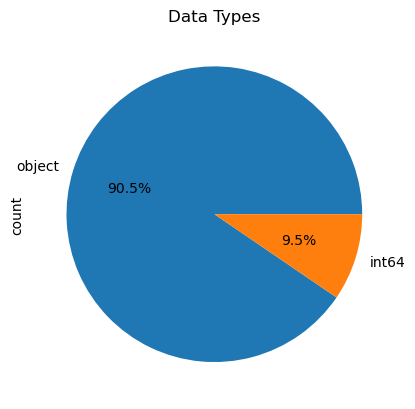

In [57]:
df.dtypes.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Data Types') 
plt.show()

In [58]:
df.head().T

,0,1,2,3,4
School_Year,2015-2016,2015-2016,2015-2016,2015-2016,2015-2016
Busbreakdown_ID,1224901,1225098,1215800,1215511,1215828
Run_Type,Pre-K/EI,Pre-K/EI,Pre-K/EI,Pre-K/EI,Pre-K/EI
Bus_No,811,9302,358,331,332
Route_Number,1,1,2,2,2
Reason,Other,Heavy Traffic,Heavy Traffic,Other,Other
Schools_Serviced,C353,C814,C195,C178,S176
Occurred_On,10/26/2015 08:30:00 AM,10/27/2015 07:10:00 AM,09/18/2015 07:36:00 AM,09/17/2015 08:08:00 AM,09/18/2015 07:39:00 AM
Created_On,10/26/2015 08:40:00 AM,10/27/2015 07:11:00 AM,09/18/2015 07:38:00 AM,09/17/2015 08:12:00 AM,09/18/2015 07:45:00 AM
Boro,Bronx,Bronx,Bronx,Bronx,Bronx


In [59]:
df['School_Year'].nunique()

4

<Axes: >

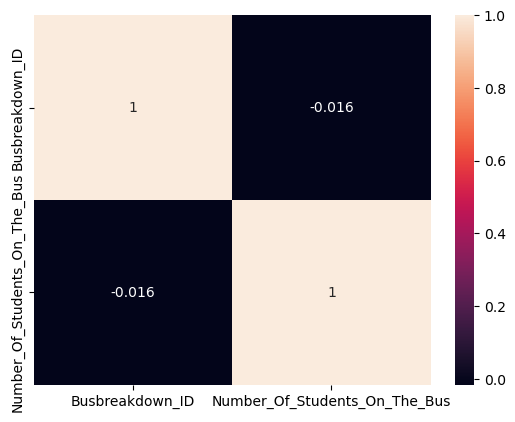

In [60]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

## let's change the dttype of the 'School_Year' to date, ''

In [62]:
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])
df['Occurred_On_Date'] = pd.to_datetime(df['Occurred_On'])
df['Occurred_On_Date'] = df['Occurred_On'].dt.date
df['Occurred_On_Time'] = df['Occurred_On'].dt.time

In [63]:
df.describe(exclude=np.number).T

,count,unique,top,freq,mean,min,25%,50%,75%,max
School_Year,147972,4,2016-2017,83141,NaN,NaN,NaN,NaN,NaN,NaN
Run_Type,147883,10,Special Ed AM Run,85990,NaN,NaN,NaN,NaN,NaN,NaN
Bus_No,147972,10765,9354,468,NaN,NaN,NaN,NaN,NaN,NaN
Route_Number,147884,11283,1,2569,NaN,NaN,NaN,NaN,NaN,NaN
Reason,147870,10,Heavy Traffic,87426,NaN,NaN,NaN,NaN,NaN,NaN
Schools_Serviced,147972,5180,C814,1735,NaN,NaN,NaN,NaN,NaN,NaN
Occurred_On,147972,NaN,NaN,NaN,2016-08-22 19:47:12.157976064,2015-09-01 06:12:00,2016-02-12 07:28:45,2016-09-26 07:05:00,2017-02-17 13:28:30,2020-03-30 06:30:00
Created_On,147972,75822,01/26/2016 07:57:00 AM,19,NaN,NaN,NaN,NaN,NaN,NaN
Boro,141654,11,Bronx,40995,NaN,NaN,NaN,NaN,NaN,NaN
Bus_Company_Name,147972,91,"G.V.C., LTD.",14198,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
head_camp = df['Bus_Company_Name'].value_counts().head(10)


[Text(0.5, 0, 'Bus_Company_Name')]

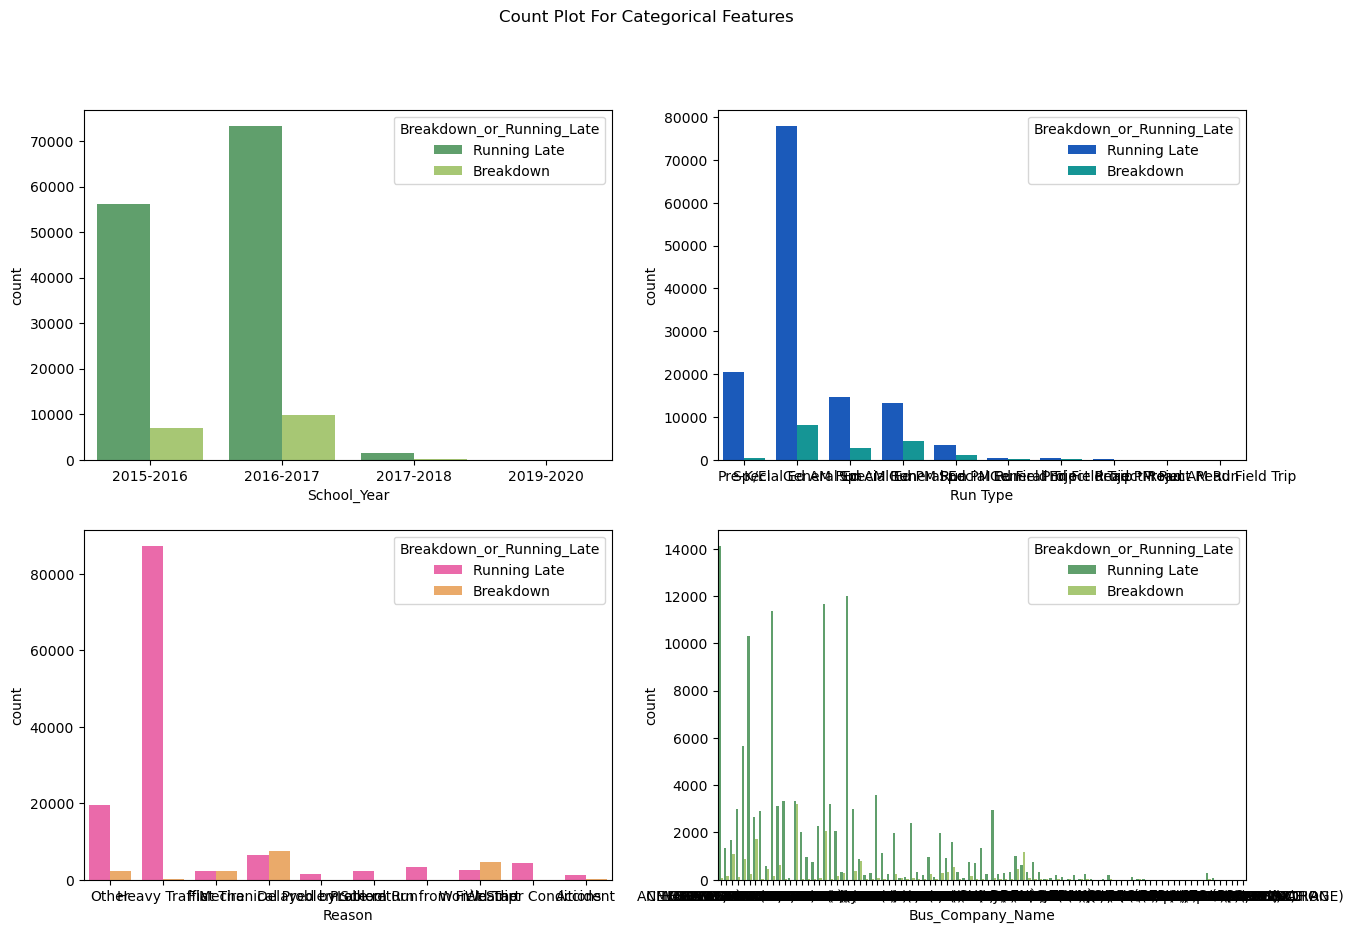

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle('Count Plot For Categorical Features')

ax1 = sns.countplot(x ='School_Year' , data=df, hue='Breakdown_or_Running_Late', ax=ax[0, 0], palette='summer')
ax1.set(xlabel='School_Year')

ax2 = sns.countplot(x ='Run_Type' , data=df, hue='Breakdown_or_Running_Late', ax=ax[0, 1], palette='winter')
ax2.set(xlabel='Run Type')


ax3 = sns.countplot(x ='Reason' , data=df, hue='Breakdown_or_Running_Late', ax=ax[1, 0], palette='spring')
ax3.set(xlabel='Reason')


ax4 = sns.countplot(x = df['Bus_Company_Name'], data=df, hue='Breakdown_or_Running_Late', ax=ax[1, 1], palette='summer')
ax4.set(xlabel='Bus_Company_Name')

[Text(0.5, 0, 'Bus_Company_Name')]

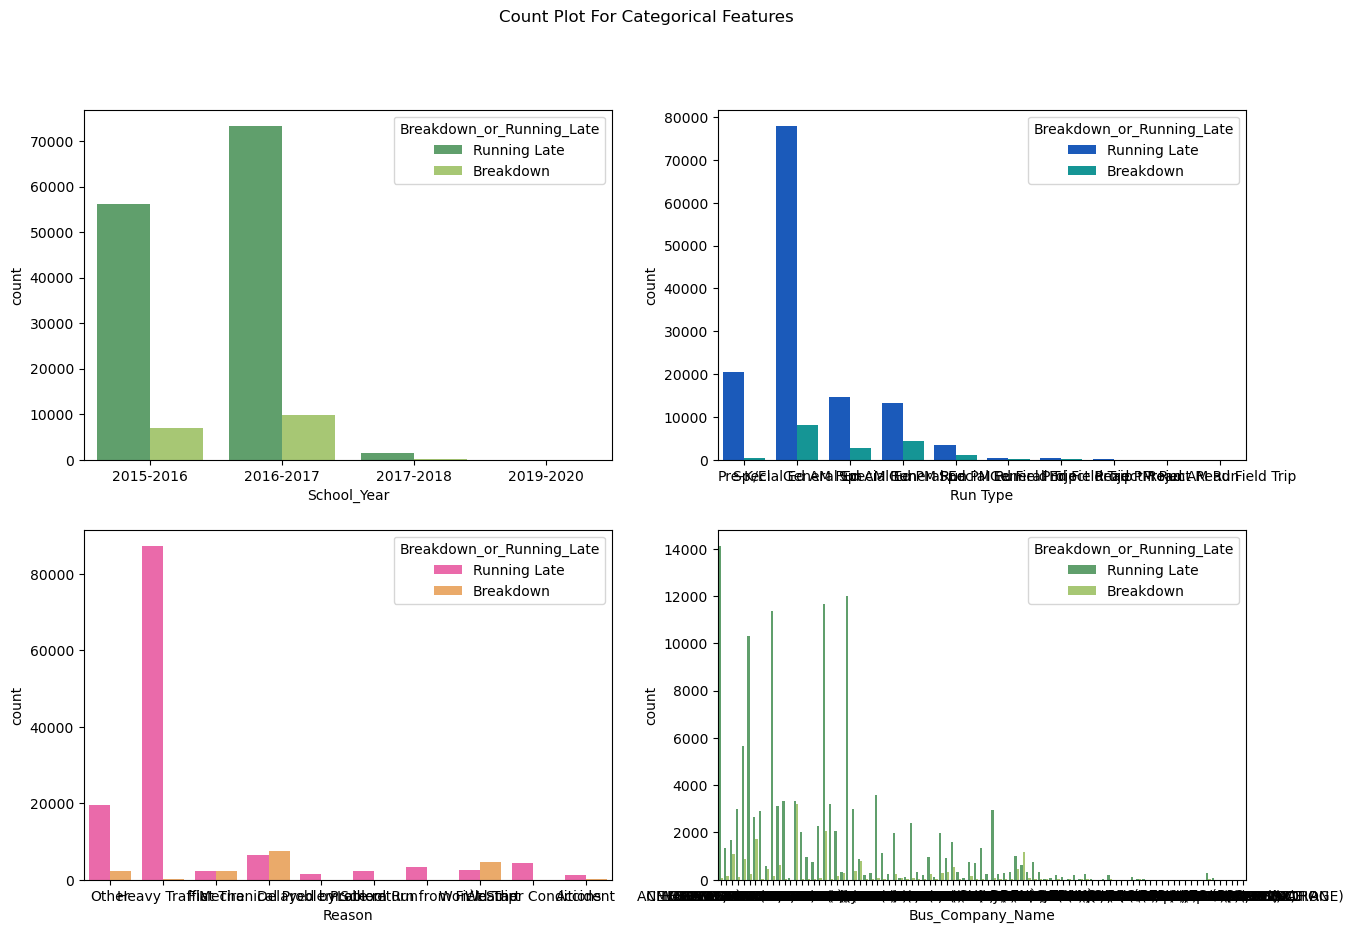

In [68]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle('Count Plot For Categorical Features')

ax1 = sns.countplot(x ='School_Year' , data=df, hue='Breakdown_or_Running_Late', ax=ax[0, 0], palette='summer')
ax1.set(xlabel='School_Year')

ax2 = sns.countplot(x ='Run_Type' , data=df, hue='Breakdown_or_Running_Late', ax=ax[0, 1], palette='winter')
ax2.set(xlabel='Run Type')


ax3 = sns.countplot(x ='Reason' , data=df, hue='Breakdown_or_Running_Late', ax=ax[1, 0], palette='spring')
ax3.set(xlabel='Reason')


ax4 = sns.countplot(x ='Bus_Company_Name' , data=df, hue='Breakdown_or_Running_Late', ax=ax[1, 1], palette='summer')
ax4.set(xlabel='Bus_Company_Name')

In [70]:
df['Breakdown_or_Running_Late'].value_counts()

Breakdown_or_Running_Late
Running Late    130857
Breakdown        17115
Name: count, dtype: int64

array([[<Axes: title={'center': 'Busbreakdown_ID'}>,
        <Axes: title={'center': 'Occurred_On'}>],
       [<Axes: title={'center': 'Number_Of_Students_On_The_Bus'}>,
        <Axes: >]], dtype=object)

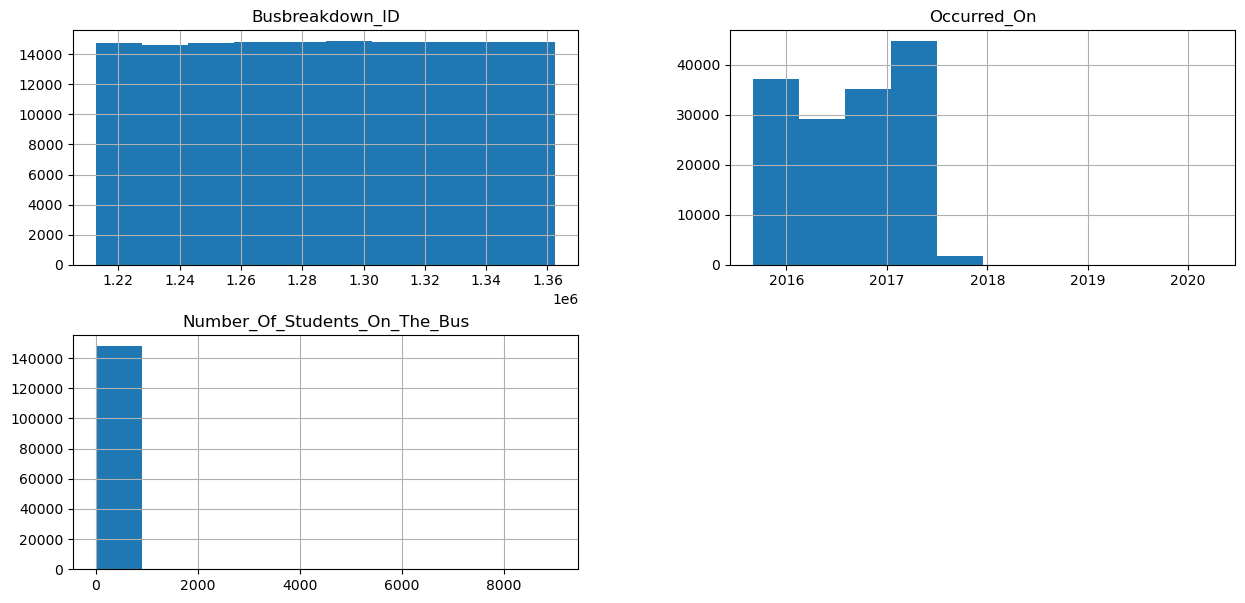

In [71]:
df.hist(figsize=(15, 7))

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [72]:
df.drop(columns=['Busbreakdown_ID', 'Occurred_On', 'Bus_No', 'Incident_Number'], axis=1, inplace=True)

In [74]:
df.isnull().sum()

School_Year                            0
Run_Type                              89
Route_Number                          88
Reason                               102
Schools_Serviced                       0
Created_On                             0
Boro                                6318
Bus_Company_Name                       0
How_Long_Delayed                   21630
Number_Of_Students_On_The_Bus          0
Has_Contractor_Notified_Schools        0
Has_Contractor_Notified_Parents        0
Have_You_Alerted_OPT                   0
Informed_On                            0
Last_Updated_On                        0
Breakdown_or_Running_Late              0
School_Age_or_PreK                     0
Occurred_On_Date                       0
Occurred_On_Time                       0
dtype: int64

In [75]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cols = ['Run_Type', 'Reason', 'Boro', 'Route_Number', 'How_Long_Delayed']
df[cols] = imputer.fit_transform(df[cols])


In [76]:
import re
def process_range(value):
    numbers = re.findall(r'\d+', value)
    
    if len(numbers) == 1:
        return f"{numbers[0]} min"
    elif len(numbers) > 1:
        average = sum(map(int, numbers)) // len(numbers)
        return f"{average} min"
    else:
        return "0 min"  

In [77]:
df['How_Long_Delayed'] = df['How_Long_Delayed'].astype(str)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.lower()
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace(r'mins|minutes', 'min', regex=True)
df['How_Long_Delayed'] = df['How_Long_Delayed'].apply(process_range)

df['Delay_Minutes'] = df['How_Long_Delayed'].str.extract(r'(\d+)').astype(int)
df.drop(['How_Long_Delayed'], axis=1, inplace=True)

### Label Encoder.

In [78]:
binary_cols = ['Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT']

l_encoder = LabelEncoder()

for col in df.columns:
    df[col] = l_encoder.fit_transform(df[col])

In [79]:
df.head().T

,0,1,2,3,4
School_Year,0,0,0,0,0
Run_Type,3,3,3,3,3
Route_Number,77,77,209,209,209
Reason,6,3,3,6,6
Schools_Serviced,5003,5071,4969,4968,5149
Created_On,61017,61329,51829,51656,51836
Boro,1,1,1,1,1
Bus_Company_Name,27,27,27,27,27
Number_Of_Students_On_The_Bus,5,3,12,11,12
Has_Contractor_Notified_Schools,1,1,1,1,1


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [80]:
X = df.drop(columns=['Breakdown_or_Running_Late'])
y = df['Breakdown_or_Running_Late']

In [81]:
std_scaler = StandardScaler()

X = std_scaler.fit_transform(X)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [83]:
print(f"X Trian {X_train.shape}")
print(f"X Test {X_test.shape}\n")

print(f"y Trian {y_train.shape}")
print(f"y Test {y_test.shape}")

X Trian (118377, 18)
X Test (29595, 18)

y Trian (118377,)
y Test (29595,)


In [84]:
y_test.value_counts()

Breakdown_or_Running_Late
1    26214
0     3381
Name: count, dtype: int64

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [85]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))

model.add(layers.Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(layers.Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(layers.Dense(units=32, activation='relu', kernel_initializer='uniform'))

model.add(layers.Dense(units=1, activation='sigmoid'))

In [86]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='../Models/model.keras',
        save_best_only=True,
        monitor='val_loss',
        verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,  
        restore_best_weights=True,
        verbose=1
    )
]

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [87]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 873 (3.41 KB)

 Trainable params: 873 (3.41 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [89]:
BATCH_SIZE = 256
EPOCHS = 50

In [90]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = callbacks
)

Epoch 1/50
245/370 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.8726 - loss: 0.4796
Epoch 1: val_loss improved from inf to 0.21699, saving model to ../Models/model.keras
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.8763 - loss: 0.4294 - val_accuracy: 0.8833 - val_loss: 0.2170
Epoch 2/50
277/370 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8965 - loss: 0.1961
Epoch 2: val_loss improved from 0.21699 to 0.16269, saving model to ../Models/model.keras
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.9012 - loss: 0.1926 - val_accuracy: 0.9355 - val_loss: 0.1627
Epoch 3/50
272/370 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.9381 - loss: 0.1591
Epoch 3: val_loss improved from 0.16269 to 0.15265, saving model to ../Models/model.keras
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.9384 - loss: 0.1580 - val_accuracy: 0.9382 - val_loss: 0.1527
Epoch 4/50
279/370 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.9400 - loss: 0.1515
Epoch 4: val_loss improve

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [91]:
test_model = keras.models.load_model('../Models/model.keras')

loss, test_acc = test_model.evaluate(X_test, y_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.9540 - loss: 0.1073


In [93]:
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Loss: {loss:.4f}')

Test Accuracy: 0.9541
Loss: 0.1053


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [94]:
predications = test_model.predict(X_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step


In [97]:
binary_predictions = (predications > 0.5).astype(int)

print(f'Accuracy: {accuracy_score(y_test, binary_predictions)*100:.2f}%')

Accuracy: 95.41%


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [98]:
history_dict = history.history

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)

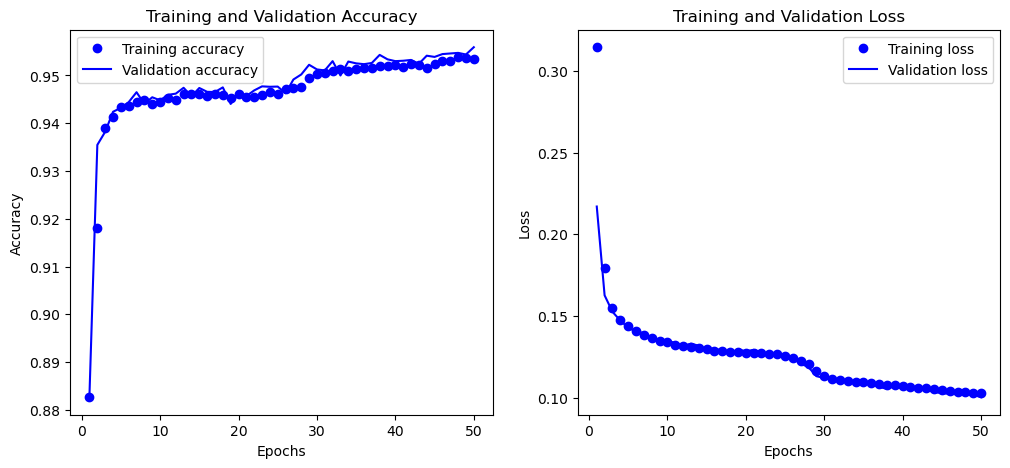

In [99]:
plt.figure(figsize=(12, 5))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('../Models/model.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: